# IMDB and Netflix Best Movies will be presented in this notebook after cleaning and wrangling the data you will see a lot of different visualization plots to get alot of intersting insights and other stuff.
Notebook Written by : Team 21 (Abdelrahman Ali Rashed - Omar Ahmed Anwar - Moustafa Mohamed Azouz - Mohanad Abdallah Abdallah) 

# importing the Lib ,
We are going to use many of them as we need a different types of Visualization as maps and normal plots as well


In [1]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import pandas as pd 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.io as pio
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

# Importing the dataset 
we are going to add two datasets to this project both of them are Movies but with different coulmn we will call the first one netflix and the second one imdb

In [2]:
imdb = pd.read_csv('imdb_top_1000.csv')

In [3]:
netflix = pd.read_csv('netflix_titles_nov_2019.csv')

In [4]:
netflix

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show
...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie
5835,70157452,Dinner for Five,NaN,NaN,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show


# split the Runtime Coulmn into two coulmns

In [5]:
netflix["date_added"] = pd.to_datetime(netflix['date_added'])
netflix['year_added'] = netflix['date_added'].dt.year
netflix['month_added'] = netflix['date_added'].dt.month

netflix['season_count'] = netflix.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
netflix['duration'] = netflix.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

In [6]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5837 non-null   int64         
 1   title         5837 non-null   object        
 2   director      3936 non-null   object        
 3   cast          5281 non-null   object        
 4   country       5410 non-null   object        
 5   date_added    5195 non-null   datetime64[ns]
 6   release_year  5837 non-null   int64         
 7   rating        5827 non-null   object        
 8   duration      5837 non-null   object        
 9   listed_in     5837 non-null   object        
 10  description   5837 non-null   object        
 11  type          5837 non-null   object        
 12  year_added    5195 non-null   float64       
 13  month_added   5195 non-null   float64       
 14  season_count  5837 non-null   object        
dtypes: datetime64[ns](1), float64(2), int6

In [7]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


the End

# Preprocessing and Wrangling

Droping the useless column in both datasets

# Cleaning_Missing_Values

Filling the Null Values With 0 

In [8]:
netflix["season_count"]=netflix["season_count"].fillna('0')


In [9]:
netflix["duration"]=netflix["duration"].fillna('0')

# Filling Null Values with unkown

In [10]:
netflix['director'] = netflix['director'].replace(np.nan,'Unknown',inplace=True)


# Droping useless columns

In [11]:
netflix=netflix.drop(['description','rating'], axis = 1)

In [12]:
imdb=imdb.drop(['Certificate'], axis = 1)

# Droping Null Values on Country Column

In [13]:
netflix=netflix.dropna(axis=0,subset=['country'], inplace=False)

In [14]:
netflix=netflix.dropna(axis=0,subset=['year_added'], inplace=False)

# Filling the Null with the mean

In [15]:
mean_meta=imdb["Meta_score"].mean
mean_meta

<bound method Series.mean of 0       80.0
1      100.0
2       84.0
3       90.0
4       96.0
       ...  
995     76.0
996     84.0
997     85.0
998     78.0
999     93.0
Name: Meta_score, Length: 1000, dtype: float64>

In [16]:
imdb["Meta_score"].fillna(mean_meta, inplace=True)


In [17]:
imdb


,Poster_Link,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [18]:
mean_gross=imdb["Gross"].mean
imdb["Gross"].fillna(mean_gross, inplace=True)

In [19]:
imdb.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

# take the first genre

In [20]:
imdb["Genre"]=imdb["Genre"].str.split(',', n = 1, expand = True)

In [21]:
imdb["Genre"]

0       Drama
1       Crime
2      Action
3       Crime
4       Crime
        ...  
995    Comedy
996     Drama
997     Drama
998     Drama
999     Crime
Name: Genre, Length: 1000, dtype: object

In [22]:
netflix["listed_in"]=netflix["listed_in"].str.split(',', n = 1, expand = True)

In [23]:
netflix["listed_in"]

0             International TV Shows
2                           Comedies
3                             Dramas
5                           Comedies
6                             Dramas
                    ...             
5832                     Cult Movies
5833                   Horror Movies
5834                          Dramas
5835    Stand-Up Comedy & Talk Shows
5836                          Dramas
Name: listed_in, Length: 4799, dtype: object

# Change Data into Numeric 

In [24]:
imdb['Gross'] = imdb['Gross'].str.replace(',', '').astype('float')
imdb['Runtime'] = imdb['Runtime'].apply(lambda text: text.split()[0]).astype('int')
imdb['Gross'] = imdb['Gross'].replace(np.nan, np.mean(imdb['Gross']))
netflix['duration'] = netflix.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

In [25]:
netflix.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 5836
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       4799 non-null   int64         
 1   title         4799 non-null   object        
 2   director      0 non-null      object        
 3   cast          4363 non-null   object        
 4   country       4799 non-null   object        
 5   date_added    4799 non-null   datetime64[ns]
 6   release_year  4799 non-null   int64         
 7   duration      4799 non-null   object        
 8   listed_in     4799 non-null   object        
 9   type          4799 non-null   object        
 10  year_added    4799 non-null   float64       
 11  month_added   4799 non-null   float64       
 12  season_count  4799 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 524.9+ KB


In [26]:
imdb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Runtime        1000 non-null   int32  
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     1000 non-null   object 
 8   Director       1000 non-null   object 
 9   Star1          1000 non-null   object 
 10  Star2          1000 non-null   object 
 11  Star3          1000 non-null   object 
 12  Star4          1000 non-null   object 
 13  No_of_Votes    1000 non-null   int64  
 14  Gross          1000 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(11)
memory usage: 113.4+ KB


In [27]:
fig = px.imshow(imdb.corr(),
                labels=dict(x="attribute", y="attribute", color="Correlation"),
                x=['Runtime', 'Rating', 'no of votes', 'Gross'],
                y=['Runtime', 'Rating', 'no of votes', 'Gross']
               )
fig.show()

# Scattter Plot shows Movies With its genre and Gross and no of votes

In [28]:
fig = px.scatter(imdb, x='Gross', y='No_of_Votes', hover_data=['Series_Title'],
                color='Genre')

fig.update_layout(font=dict(family='Lato', size=18, color='black'), 
                  title=dict(text='IMDB MOVIES - SCATTER PLOT',
                           font=dict(size=30), x=.5), 
                  paper_bgcolor= 'gainsboro', plot_bgcolor='gainsboro',
                 xaxis=dict(title='Gross', showgrid=False),
                 yaxis=dict(title='Number of votes', showgrid=False))

# Relation between Rating and Gross

In [29]:
px.scatter(imdb,x='IMDB_Rating',y='Gross',hover_data=['Series_Title','Released_Year'],color='Genre')

# first insight:from the (gross,rating) plot we can find that there's no direct realtion between the gross and rating  due to the "realesed year" variable , as the movie with the highest rating didn't have the highest gross relative to the realeased year 

In [30]:
fig = px.histogram(data_frame=imdb.sort_values(by='Released_Year'), x='Released_Year', y="Gross",histfunc="sum",
                   color_discrete_sequence=['green'])

fig.update_layout(font=dict(family='Lato', size=18, color='black'), 
                  title=dict(text='Relation between Released year and Gross',
                           font=dict(size=30), x=.5), 
                  paper_bgcolor= 'white', plot_bgcolor='white',
                 xaxis = dict(title='year', showgrid=False),
                 yaxis=dict(showgrid=False),bargap=0.2) 

# 2nd insight: here we can see the relation between the total gross of the movies produced each year relative to the released year 
# 3rd insight : in 2020 the total gross dropped due to the corona pandemic 

In [31]:
fig = px.scatter(imdb, x='Gross', y='Released_Year', hover_data=['Series_Title'],
                color='Genre')

fig.update_layout(font=dict(family='Lato', size=18, color='black'), 
                  title=dict(text='IMDB MOVIES - SCATTER PLOT',
                           font=dict(size=30), x=.5), 
                  paper_bgcolor= 'gainsboro', plot_bgcolor='gainsboro',
                 xaxis=dict(title='Gross', showgrid=False),
                 yaxis=dict(title='Released_Year', showgrid=False))

# scatter plot between each movie gross and released year

# top 7 Directors with the most Gross
# insight: the top 7 directors with the most gross have made more than 500M each

In [32]:
plt.figure(figsize=(25,10))
fig = px.histogram(imdb[imdb.Gross > 500000000], x = 'Director', y = 'Gross',color='Director',histfunc="sum")
fig.show()

<Figure size 1800x720 with 0 Axes>

# Plot show The Range in Gross between movies

Text(0.5, 1.0, 'Movies_Gross($)')

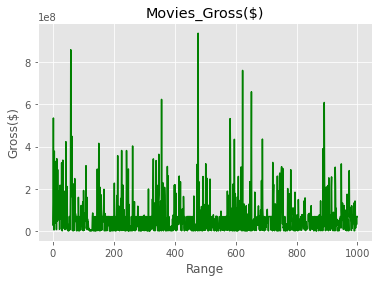

In [33]:
style.use('ggplot')
plt.plot(imdb['Gross'],'g',label='line one')
plt.xlabel('Range')
plt.ylabel('Gross($)')
plt.title('Movies_Gross($)')

# number of movies released in 2020 dropped due to the corona pandemic


In [34]:
fig = px.histogram(data_frame=imdb.sort_values(by='Released_Year'), x='Released_Year', 
                   color_discrete_sequence=['maroon'])

fig.update_layout(font=dict(family='Lato', size=18, color='black'), 
                  title=dict(text='Distributions of IMBD movies from 1920 - now',
                           font=dict(size=30), x=.5), 
                  paper_bgcolor= 'white', plot_bgcolor='white',
                 xaxis = dict(title='Year of release', showgrid=True),
                 yaxis=dict(showgrid=False),bargap=0.2)

# # Top Movies Gross

In [36]:
top_gross = imdb.sort_values(['Gross'], ascending = False)
fig = px.histogram(top_gross,x=top_gross['Series_Title'][:10], y=top_gross['Gross'][:10],color=top_gross['Genre'][:10],title="Top 7 Gross Movies")
fig.show()

# Distribution of movie duration
# here we can see that the average time for movies is 90 to 100 mins

In [43]:
import plotly.figure_factory as ff
x1 = line2['duration'].fillna(0.0).astype(float)
fig = ff.create_distplot([x1], ['Movie duration'], bin_size=0.8, curve_type='normal', colors=["#6ad49b"])
fig.update_layout(title_text='Distplot with  Distribution')
fig.show()

# top 10 movies with the highest rating

In [38]:
df4=imdb.sort_values("Gross", ascending=False).head(10)
#df4=imdb.sort_values("IMDB_Rating", ascending=False).head(10)

fig = px.bar(df4,x="Series_Title", y="IMDB_Rating",color=
    'Gross',hover_data=['Gross'],width=900,
    height=700,)
fig.show()

# pie chart which shows the most content presented on netflix
# 78.5% of the content presented on netflix are movies 


In [39]:
col = "type"
grouped = netflix[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

# pie chart which represent the most common genre on netflix

In [40]:
col = "listed_in"
grouped = netflix[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="Most Genre On Netflix", height=500, legend=dict(x=0.01, y=0.001))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

# Growth of netflix Content over years

In [41]:
line1 = netflix[netflix["type"] == "TV Show"]
line2 = netflix[netflix["type"] == "Movie"]
col = "year_added"

In [44]:
vc1 = line1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

In [45]:
vc2 = line2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

In [46]:
trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#b558de"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over on Netflix the years", legend=dict(x=1.1, y=1.1, orientation="v"))
fig = go.Figure(data, layout=layout)
fig.show()


# this map represent each country and how many original movies does it have on netflix

In [47]:
country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

## countries 
from collections import Counter
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]
    
def geoplot(netflix):
    country_with_code, country = {},{}
    shows_countries = ", ".join(netflix['country'].dropna()).split(", ")
    for c,v in dict(Counter(shows_countries)).items():
        code = ""
        if c.lower() in country_codes:
            code = country_codes[c.lower()]
        country_with_code[code] = v
        country[c] = v

    data = [dict(
            type = 'choropleth',
            locations = list(country_with_code.keys()),
            z = list(country_with_code.values()),
            colorscale = [[0,"rgb(5, 10, 172)"],[0.65,"rgb(40, 60, 190)"],[0.75,"rgb(70, 100, 245)"],\
                        [0.80,"rgb(90, 120, 245)"],[0.9,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'gray',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                title = ''),
          ) ]

    layout = dict(
        title = '',
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    iplot( fig, validate=False, filename='d3-world-map' )
    return country

country_vals = geoplot(netflix)
tabs = Counter(country_vals).most_common(25)

labels = [_[0] for _ in tabs][::-1]
values = [_[1] for _ in tabs][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Countries with most content", height=700, legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

# we use treemap to divided data according to Genre and put movies in ascending order according to imdb rate

In [51]:
fig=px.treemap(imdb.head(50),path=['Genre','Series_Title','Director'],values = 'IMDB_Rating',hover_data=['Gross','Star1','Star2'])
fig.show()


In [49]:
netflix

,show_id,title,director,cast,country,date_added,release_year,duration,listed_in,type,year_added,month_added,season_count
0,81193313,Chocolate,None,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,,International TV Shows,TV Show,2019.0,11.0,1
2,81213894,The Zoya Factor,None,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,135,Comedies,Movie,2019.0,11.0,
3,81082007,Atlantics,None,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,106,Dramas,Movie,2019.0,11.0,
5,81172754,Crazy people,None,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,2019-11-29,2018,107,Comedies,Movie,2019.0,11.0,
6,81120982,I Lost My Body,None,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,2019-11-29,2019,81,Dramas,Movie,2019.0,11.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,Mad Ron's Prevues from Hell,None,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,1987,84,Cult Movies,Movie,2010.0,11.0,
5833,70127998,Splatter,None,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,2009,29,Horror Movies,Movie,2009.0,11.0,
5834,70084180,Just Another Love Story,None,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,2007,104,Dramas,Movie,2009.0,5.0,
5835,70157452,Dinner for Five,None,NaN,United States,2008-02-04,2007,,Stand-Up Comedy & Talk Shows,TV Show,2008.0,2.0,1


#  Top Action Movies Gross

In [50]:
small = imdb[imdb["Genre"] == "Action"].head(10)
small=small.sort_values("Gross", ascending=True)
small
fig = px.bar(small, x='Series_Title', y='Gross',
             hover_data=['Released_Year', 'IMDB_Rating'], color='No_of_Votes', height=700)
fig.show()